In [243]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings('ignore')

In [281]:
directory = os.getcwd()
data_all = pd.read_csv(directory + '/EMS_2017_2018_cat_final_onehot_thresh.csv', sep=',') 

In [282]:
data_all.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,T0,T1,T3,T4,T5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4,287,579.0,292.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,11,301.0,290.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,14,270.0,256.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,9,25.0,16.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,18,218.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [283]:
data = data_all[['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY','HELD_INDICATOR', 'T0', 'T1', 'T4',\
                 'T5', 'T10', 'T12', 'T14', 'T15','T17', 'T21', 'T25', 'T27', 'T35', 'T37', '10457.0', '11207.0',\
                 'City_2.0', 'City_4.0', 'City_15.0', 'City_17.0', 'City_37.0','City_42.0', 'Comm_105.0', 'Schl_8.0',\
                 'Schl_9.0', 'Schl_10.0','Schl_27.0', 'Schl_28.0', 'Con_6.0', 'Con_7.0', 'Con_8.0', 'Con_9.0',\
                 'Con_10.0', 'Con_11.0', 'Con_12.0', 'Con_13.0', 'Con_14.0', 'Con_15.0','Day_0', 'Day_1', 'Day_2',\
                 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Hr_0','Hr_1', 'Hr_2', 'Hr_3', 'Hr_4', 'Hr_5', 'Hr_6', 'Hr_7', \
                 'Hr_8', 'Hr_9','Hr_10', 'Hr_11', 'Hr_12', 'Hr_13', 'Hr_14', 'Hr_15', 'Hr_16', 'Hr_17','Hr_18', \
                 'Hr_19', 'Hr_20', 'Hr_21', 'Hr_22', 'Hr_23', 'Month_1','Month_2', 'Month_3', 'Month_4', 'Month_5',\
                 'Month_6', 'Month_7','Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12','INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [284]:
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY
0,4,287,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,292.0
1,3,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,290.0
2,2,14,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,256.0
3,4,9,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,16.0
4,3,18,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,200.0


In [285]:
data.shape

(50000, 85)

***LINEAR REGRESSION***

Create linear regression model and fit with training dataset

In [286]:
from sklearn.linear_model import LinearRegression

In [287]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY"]

In [288]:
X.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4,287,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [289]:
Y.head()

0    292.0
1    290.0
2    256.0
3     16.0
4    200.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [348]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [349]:
X_train.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
37820,4,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34120,5,8,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30688,5,44,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
35641,2,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16383,4,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [350]:
Y_train.head()

37820    371.0
34120    350.0
30688    499.0
35641    286.0
16383    260.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

In [351]:
X_test.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
6494,5,8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16357,2,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26136,6,19,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6656,3,101,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18341,3,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [352]:
Y_test.head()

6494     649.0
16357    143.0
26136    463.0
6656     383.0
18341    191.0
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: float64

***BASELINE***

In [353]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, Y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [354]:
dummy_mean.score(X_test, Y_test) 

-1.4541941706358585e-06

In [355]:
Y_pred = dummy_mean.predict(X_test)
Y_pred

array([422.80882667, 422.80882667, 422.80882667, ..., 422.80882667,
       422.80882667, 422.80882667])

In [356]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 158.17005690026667
Mean Squared Error: 39680.07201752391
Root Mean Squared Error: 199.19857433607277


***LIN REG***

In [357]:
#create linear regression model
linreg = LinearRegression()
linreg = linreg.fit(X_train,Y_train) #fit model with training data

***Linear Regression Coeffs***

In [358]:
#Intercept
print(linreg.intercept_)

429029369472.09827


In [359]:
#Coefficients/Slopes for each predictor (betas)
#Need to get rid of DISPATCH_RESPONSE_SECONDS_QY & INCIDENT_RESPONSE_SECONDS_QY - they exactly predict target
a = pd.DataFrame(linreg.coef_.transpose(),columns = ["Coefficient"])
b = pd.DataFrame(X_train.columns, columns = ["Predictors"])
coeff = pd.concat([a,b],axis=1)
coeff.head()

,Coefficient,Predictors
0,34.236885,INITIAL_SEVERITY_LEVEL_CODE
1,0.002548,DISPATCH_RESPONSE_SECONDS_QY
2,94.159930,HELD_INDICATOR
3,40.075803,T0
4,34.088450,T1


In [360]:
#R2 value
#tells us what % of the variability of our target is explained by our predictors
r_sq = linreg.score(X_test,Y_test)
r_sq

0.09524054929074377

***Model Predictions***

In [361]:
#estimate predictions from model
Y_pred = linreg.predict(X_test)
Y_pred

array([412.43310547, 315.70666504, 435.40185547, ..., 466.36199951,
       497.30273438, 510.41088867])

Plot real vs predicted travel times as scatterplot.

In [362]:
vals = pd.DataFrame({"Actual": Y_test,"Predicted": Y_pred})
vals.head()

,Actual,Predicted
6494,649.0,412.433105
16357,143.0,315.706665
26136,463.0,435.401855
6656,383.0,387.011108
18341,191.0,381.401428


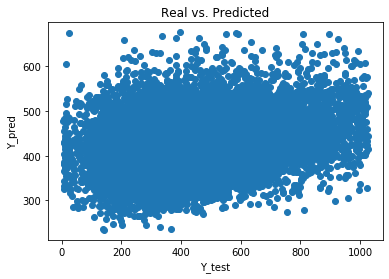

In [363]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title("Real vs. Predicted")
plt.show()

***Metric Scores***

In [364]:
#compare RMSE against mean value of target var; what % greater is it? will determine how accurate our algo is
#these are our baselines - no tuning has been done on the hyperparameters
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 149.7961621826172
Mean Squared Error: 35900.86795584576
Root Mean Squared Error: 189.4752436489943


In [365]:
#really bad score
linreg.score(X_train,Y_train)

0.10753043655774541

***RESIDUALS***

Residual = Actual - Predicted

In [366]:
vals["residuals"] = vals["Actual"]-vals["Predicted"]
vals.head()

,Actual,Predicted,residuals
6494,649.0,412.433105,236.566895
16357,143.0,315.706665,-172.706665
26136,463.0,435.401855,27.598145
6656,383.0,387.011108,-4.011108
18341,191.0,381.401428,-190.401428


***Best Fit Line***

In [367]:
vals["rss"] = (vals["residuals"])**2
vals.head()

,Actual,Predicted,residuals,rss
6494,649.0,412.433105,236.566895,55963.895588
16357,143.0,315.706665,-172.706665,29827.592149
26136,463.0,435.401855,27.598145,761.657582
6656,383.0,387.011108,-4.011108,16.088991
18341,191.0,381.401428,-190.401428,36252.703869


In [368]:
#line created by min RSS value of all tests
y_eq = linreg.intercept_ +linreg.coef_ *X_test.loc[vals["rss"].idxmin()]

In [369]:
y_eq.head()

INITIAL_SEVERITY_LEVEL_CODE     4.290294e+11
DISPATCH_RESPONSE_SECONDS_QY    4.290294e+11
HELD_INDICATOR                  4.290294e+11
T0                              4.290294e+11
T1                              4.290294e+11
Name: 36568, dtype: float64

In [370]:
#Make the eq relating each predictor to its coeff above and plot

***Distribution of Residuals***

Residuals should be approx normally distributed - they shouldn't follow a pattern. This can be inspected by plotting residuals as a histogram and/or using a probability plot.

In [371]:
from scipy import stats

(array([2.000e+00, 9.700e+01, 7.920e+02, 2.832e+03, 3.834e+03, 2.530e+03,
        1.361e+03, 6.970e+02, 3.120e+02, 4.300e+01]),
 array([-648.46026611, -514.03978271, -379.61929932, -245.19881592,
        -110.77833252,   23.64215088,  158.06263428,  292.48311768,
         426.90360107,  561.32408447,  695.74456787]),
 <a list of 10 Patch objects>)

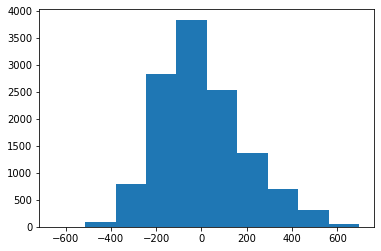

In [372]:
plt.hist(vals["residuals"])

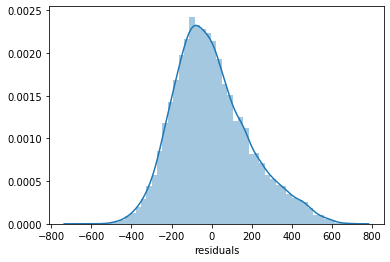

In [373]:
sns.distplot(vals["residuals"])
plt.show()

Plot residuals vs normal distribution: red line shows best-fit line for the data. Plot shows actual distr of residual quantiles and a perfectly normal distr residuals. If graph perfectly overlaying on diagonal, the residuals are normally distr.

((array([-3.86541499, -3.64327388, -3.52145379, ...,  3.52145379,
          3.64327388,  3.86541499]),
  array([-648.46026611, -592.69226074, -507.43286133, ...,  662.87017822,
          674.4854126 ,  695.74456787])),
 (187.50798417027153, 0.14579417480463294, 0.98932821397434))

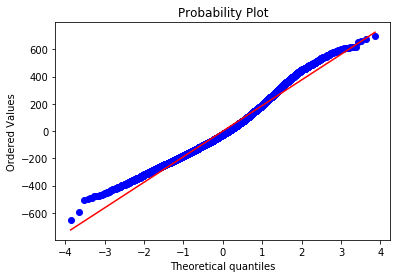

In [374]:
stats.probplot(vals["residuals"],plot=plt)

In [375]:
stats.kstest(vals["residuals"], 'norm')

KstestResult(statistic=0.5465243747091654, pvalue=0.0)

***Relationship between Residuals & Predictors***

Plot relationship between residuals and predicting variables (features in X) to look for the independence assumption. In linear regression, it is assumed that the errors (residuals of fitted model) are independent of each other. If residuals are distributed uniformly randomly around the zero x-axes and don't form specific clusters, then the assumption holds true. If the pts in a residual plot are randomly disperesed around the horiz axis, a linear reg model is appropriate for the data. There shouldn't be patterns in these.

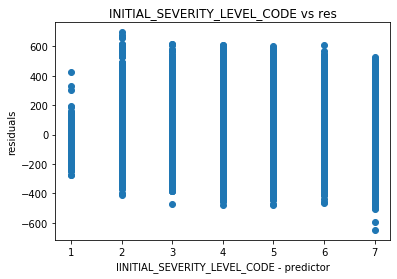

In [377]:
plt.scatter(X_test["INITIAL_SEVERITY_LEVEL_CODE"],vals["residuals"])
plt.xlabel("IINITIAL_SEVERITY_LEVEL_CODE - predictor")
plt.ylabel("residuals")
plt.title("INITIAL_SEVERITY_LEVEL_CODE vs res")
plt.show()

***LASSO LINEAR REGRESSION***